**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here
# import pakage for 3d plot
from matplotlib import cm 
from mpl_toolkits import mplot3d

# useing widgets for turning the plot
from ipywidgets import interactive
import ipywidgets as widgets

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [3]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [5]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [8]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [10]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [2]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

a. Defining the settings

In [3]:
# Settings
bounds = np.array([[-600, 600], [-600, 600]])
tau = 1e-8
max_iters = 1000

b. Functiong 

In [4]:
def optimize_and_first_quess(warmup_iters):
    x_star = None
    x_k0_values = []

    # Refined global optimizer

    for k in range(max_iters):
        # Draw random x^k
        x_k = np.random.uniform(bounds[0][0], bounds[0][1], 2)


        # Saving the best warmup itteration/ inital guess
        if k == (warmup_iters+1):
            x_first = x_star

        if k < warmup_iters:
            x_k0 = x_k
        
        else:
            chi_k = 0.5 * (2 / (1 + np.exp((k - warmup_iters) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star

        x_k0_values.append(x_k0)

        # Optimize using BFGS
        result = minimize(griewank, x_k0, method='BFGS', tol=tau)

        if x_star is None or griewank(result.x) < griewank(x_star):
            x_star = result.x

        if griewank(x_star) < tau:

            itterations = k +1  - warmup_iters           
            break


    return x_first, itterations, x_star

c. Running the functions 

In [5]:
itterations_list = []
x_1 = []
x_2 = []

for i in range(1000):
    x_first, itterations, x_star = optimize_and_first_quess(10)
    itterations_list.append(itterations)
    x_1.append(x_first[0])
    x_2.append(x_first[1])

distans_to_min = []

for i in range(len(x_1)):
    distans_to_min.append(np.sqrt((x_1[i]-x_star[0])**2 + (x_2[i]-x_star[1])**2))

KeyboardInterrupt: 

d. Plotting the results

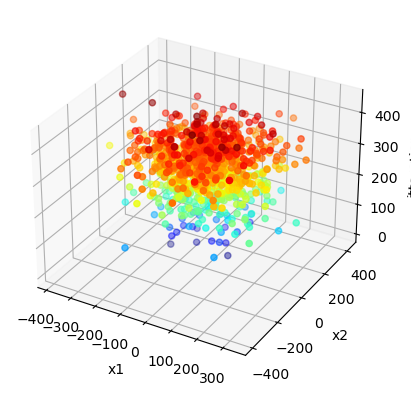

Text(0, 0.5, 'distans to min')

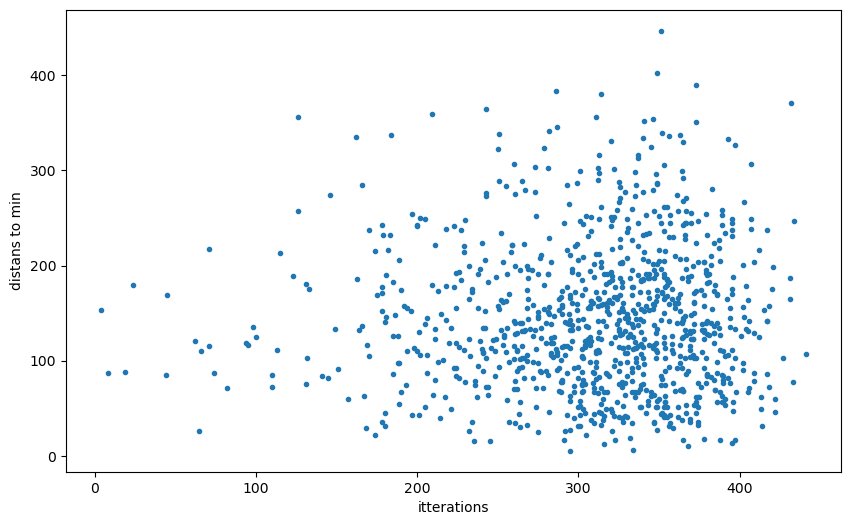

In [ ]:
# 3d plot of x1 x2 and itterations_list
figur = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_1, x_2, itterations_list, c=itterations_list, cmap=cm.jet);
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('itterations')
plt.show()

fig = plt.figure(figsize=(10,6))
plt.plot(itterations_list, distans_to_min, '.')
plt.xlabel('itterations')
plt.ylabel('distans to min')


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

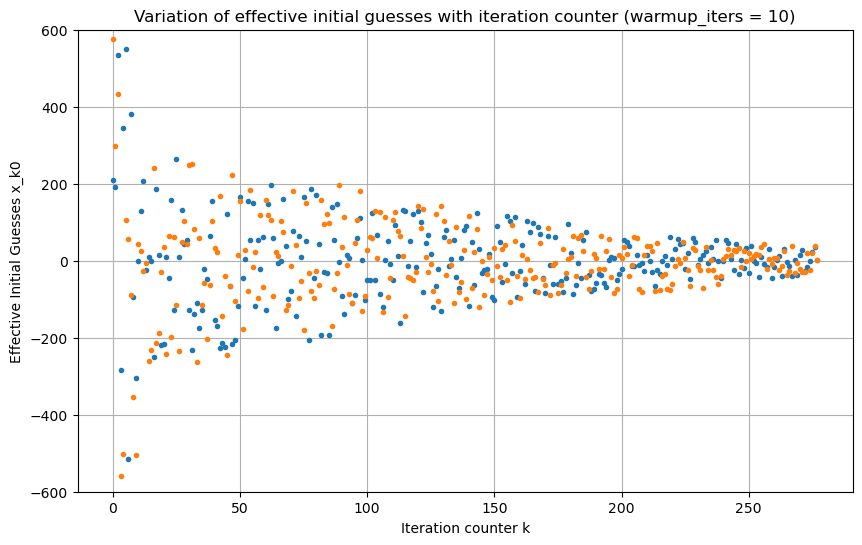

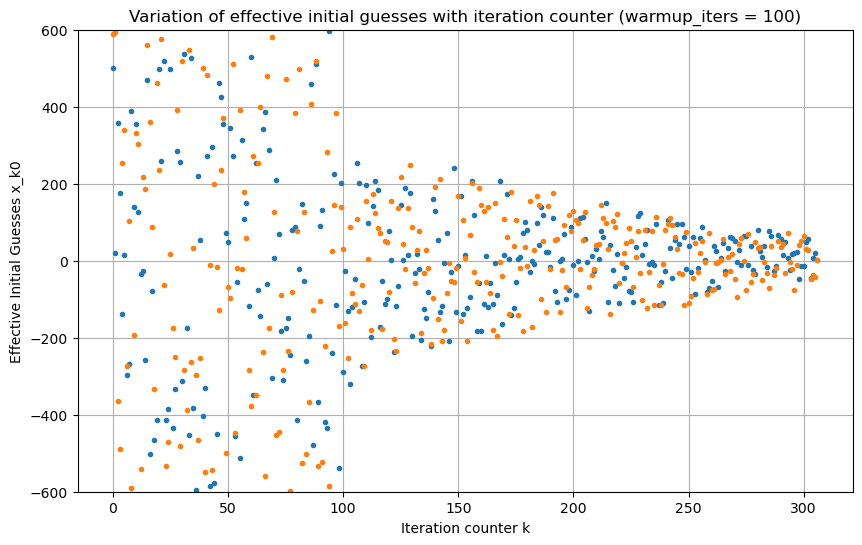

In [8]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Griewank function
def griewank(x):
    A = x[0]**2/4000 + x[1]**2/4000
    B = np.cos(x[0]/np.sqrt(1))*np.cos(x[1]/np.sqrt(2))
    return A - B + 1

# Settings
bounds = np.array([[-600, 600], [-600, 600]])
tau = 1e-8
max_iters = 1000

def optimize_and_plot(warmup_iters, plot_num):
    x_star = None
    x_k0_values = []

    # Refined global optimizer
    for k in range(max_iters):
        # Draw random x^k
        x_k = np.random.uniform(bounds[0][0], bounds[0][1], 2)

        if k < warmup_iters:
            x_k0 = x_k
        else:
            chi_k = 0.5 * (2 / (1 + np.exp((k - warmup_iters) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star

        x_k0_values.append(x_k0)

        # Optimize using BFGS
        result = minimize(griewank, x_k0, method='BFGS', tol=tau)

        if x_star is None or griewank(result.x) < griewank(x_star):
            x_star = result.x

        if griewank(x_star) < tau:
            break

    # Plot x_k0 values
    plt.figure(plot_num, figsize=(10,6))
    plt.plot(x_k0_values, '.')
    plt.xlabel('Iteration counter k')
    plt.ylim([-600, 600])
    plt.ylabel('Effective Initial Guesses x_k0')
    plt.title(f'Variation of effective initial guesses with iteration counter (warmup_iters = {warmup_iters})')
    plt.grid(True)

# Call the function with warmup_iters = 10
optimize_and_plot(10, 1)

# Call the function with warmup_iters = 100
optimize_and_plot(100, 2)

# Show the plots
plt.show()


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Griewank function
def griewank(x):
    A = x[0]**2/4000 + x[1]**2/4000
    B = np.cos(x[0]/np.sqrt(1))*np.cos(x[1]/np.sqrt(2))
    return A - B + 1

# Settings
bounds = np.array([[-600, 600], [-600, 600]])
tau = 1e-8
max_iters = 1000

def optimize_and_plot(warmup_iters, plot_num):
    x_star = None
    x_k0_values = []

    # Refined global optimizer
    for k in range(max_iters):
        # Draw random x^k
        x_k = np.random.uniform(bounds[0][0], bounds[0][1], 2)

        if k < warmup_iters:
            x_k0 = x_k
        else:
            chi_k = 0.5 * (2 / (1 + np.exp((k - warmup_iters) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star

        x_k0_values.append(x_k0)

        # Optimize using BFGS
        result = minimize(griewank, x_k0, method='BFGS', tol=tau)

        if x_star is None or griewank(result.x) < griewank(x_star):
            x_star = result.x

        if griewank(x_star) < tau:
            break




In [32]:

def optimize_and_first_quess(warmup_iters):
    x_star = None
    x_k0_values = []

    # Refined global optimizer

    for k in range(max_iters):
        # Draw random x^k
        x_k = np.random.uniform(bounds[0][0], bounds[0][1], 2)


        # Saving the best warmup itteration/ inital guess
        if k == (warmup_iters+1):
            x_first = x_star

        if k < warmup_iters:
            x_k0 = x_k
        
        else:
            chi_k = 0.5 * (2 / (1 + np.exp((k - warmup_iters) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star

        x_k0_values.append(x_k0)

        # Optimize using BFGS
        result = minimize(griewank, x_k0, method='BFGS', tol=tau)

        if x_star is None or griewank(result.x) < griewank(x_star):
            x_star = result.x

        if griewank(x_star) < tau:

            itterations = k +1  - warmup_iters           
            break


    return x_first, itterations, x_star




itterations_list = []

for i in []:
    x_first, itterations, x_star = optimize_and_first_quess(i)

    print (f'{i} itterations: {itterations}')

#x_first, itterations, x_star


10 itterations: 283
50 itterations: 409
100 itterations: 431


In [42]:

itterations_list = []
x_1 = []
x_2 = []


for i in range(1000):
    x_first, itterations, x_star = optimize_and_first_quess(10)
    itterations_list.append(itterations)
    x_1.append(x_first[0])
    x_2.append(x_first[1])



In [49]:
distans_to_min = []

for i in range(len(x_1)):
    distans_to_min.append(np.sqrt((x_1[i]-x_star[0])**2 + (x_2[i]-x_star[1])**2))


Text(0, 0.5, 'distans to min')

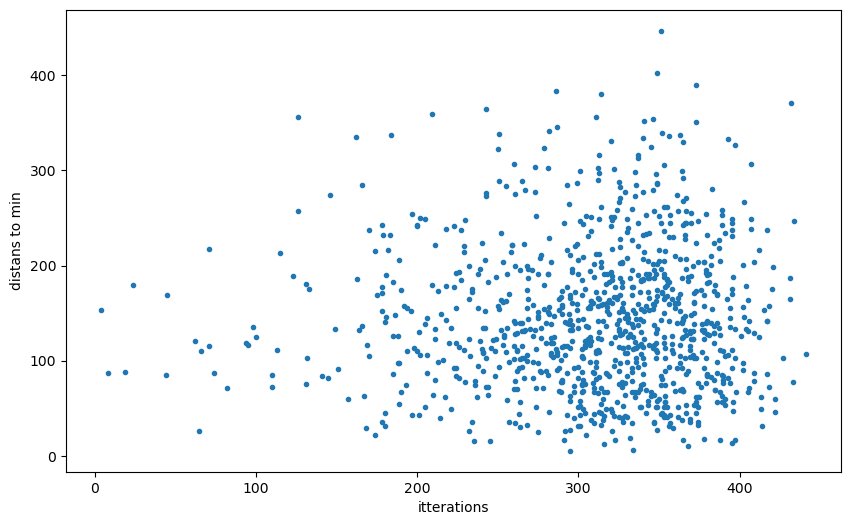

In [51]:
# 3d plot of x1 x2 and itterations_list
figur = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_1, x_2, itterations_list, c=itterations_list, cmap=cm.jet);
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('itterations')
plt.show()

fig = plt.figure(figsize=(10,6))
plt.plot(itterations_list, distans_to_min, '.')
plt.xlabel('itterations')
plt.ylabel('distans to min')


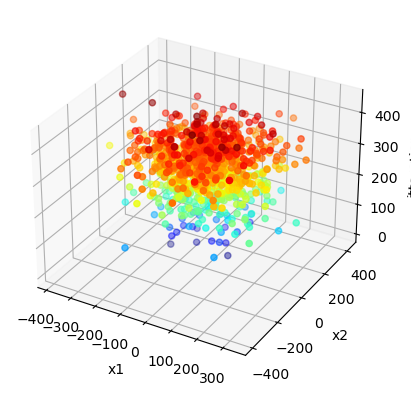

In [48]:
# import pakage for 3d plot
from matplotlib import cm 
from mpl_toolkits import mplot3d

# useing widgets for turning the plot
from ipywidgets import interactive
import ipywidgets as widgets

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# 3d plot of x1 x2 and itterations_list
figur = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_1, x_2, itterations_list, c=itterations_list, cmap=cm.jet);
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('itterations')
plt.show()